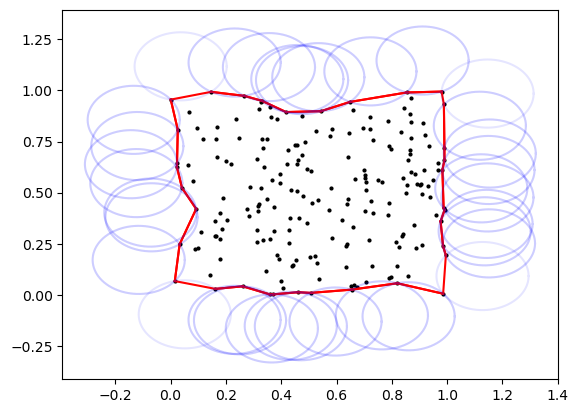

over!!!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import Delaunay
from sklearn.neighbors import KDTree


def plot_circle(centers,rs,ax):
    N = centers.shape[0]
    for i in range(N):
        theta = np.arange(0, 2*np.pi, 0.01)
        x = centers[i,0] + rs[i] * np.cos(theta)
        y = centers[i,1] + rs[i] * np.sin(theta)
        ax.plot(x, y, 'b-', alpha=0.1)


def edge_check_vaild(e,tree,r,err):
    xp = e[0]
    xq = e[1]
    L = np.sqrt(np.dot(xq-xp,xq-xp))
    if L > 2*r:
        return False, -1
    vec = (xq-xp)/L # the vector from p to q
    normal = np.array([vec[1],-vec[0]])
    c1 = (xp + xq) / 2 + normal * np.sqrt(r**2-(L/2)**2)
    c2 = (xp + xq) / 2 - normal * np.sqrt(r**2-(L/2)**2)
    c = np.array([c1,c2])
    count = tree.query_radius(c,r=r+err,return_distance=False,count_only=True,sort_results=False)
    if count[0]<=2:
        return True, c[0]
    elif count[1]<=2:
        return True, c[1]
    else:
        return False, -1


def boundary_extract(points,alpha,err=10e-3):
    """
    Here, parameter err was place, because there are errors when calculating distance
    meanwhile, this err was different for different scaling 2D point cloud
    so, a parameter was placed here to considering the calculation errors
    """
    R = 1 / alpha
    pts = np.copy(points)
    tree = KDTree(pts, leaf_size=2)
    tri = Delaunay(pts)
    s = tri.simplices
    N = s.shape[0]
    i = 0
    edges = []
    centers = []
    while i <= N - 1:
        if s[i,0]==-1:
            i = i + 1
            continue
        p3 = s[i]
        e1 = np.array([points[p3[0],:],points[p3[1],:]])
        e2 = np.array([points[p3[1],:],points[p3[2],:]])
        e3 = np.array([points[p3[0],:],points[p3[2],:]])
        e = [e1,e2,e3]
        for j in range(3):
            flag, center = edge_check_vaild(e[j],tree,R,err)
            if flag:
                edges.append(e[j])
                centers.append(center)
        nb = tri.neighbors[i]
        nb_valid = nb[nb!=-1]
        #nb_valid_num = nb_valid.shape[0]
        #s[nb_valid] = -1
        i = i + 1
    return edges, centers


def show_edge(edges,points,circle=None,r=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(*zip(*points),s=4,c='k')
    for i in range(len(edges)):
        ax.plot(*zip(*edges[i]),'-r')
    if circle is not None:
        plot_circle(circle,r,ax)
    plt.show()


if __name__ == "__main__":
    pts = np.random.rand(200, 2) # 随机生成10个2维点
    alpha = 6
    edges, centers = boundary_extract(pts,alpha,err=10e-5)
    show_edge(edges,pts,circle=np.array(centers),r=np.ones(len(centers))/alpha)
    print("over!!!")


![](https://shangxueweilong.oss-cn-guangzhou.aliyuncs.com/202308231713944.png)